<a href="https://colab.research.google.com/github/RoseMwangi98/CARREFOUR_ANALYSIS/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

**Part 4: Anomaly Detection**

You have also been requested to check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

In [1]:
#load the required library in the dataset
# Installing anomalize package

install.packages("anomalize")
library(tidyverse)
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stat

In [2]:
dataset <- read.csv("http://bit.ly/CarreFourSalesDataset")
head(dataset)
tail(dataset)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


,Date,Sales
,<chr>,<dbl>
995,2/18/2019,63.9975
996,1/29/2019,42.3675
997,3/2/2019,1022.4900
998,2/9/2019,33.4320
999,2/22/2019,69.1110
1000,2/18/2019,649.2990


In [4]:
#The dataset had two columns , the Date column was of type character so I converted it to date format using the as.Date function.
dataset$Date <- as.Date(dataset$Date , format = "%m/%d/%Y")
head(dataset)
unique(dataset$Date)
dataset <- as_tbl_time(dataset , index= Date)

,Date,Sales
,<date>,<dbl>
1,2019-01-05,548.9715
2,2019-03-08,80.2200
3,2019-03-03,340.5255
4,2019-01-27,489.0480
5,2019-02-08,634.3785
6,2019-03-25,627.6165


[1] "2019-01-05" "2019-03-08" "2019-03-03" "2019-01-27" "2019-02-08"
 [6] "2019-03-25" "2019-02-25" "2019-02-24" "2019-01-10" "2019-02-20"
[11] "2019-02-06" "2019-03-09" "2019-02-12" "2019-02-07" "2019-03-29"
[16] "2019-01-15" "2019-03-11" "2019-01-01" "2019-01-21" "2019-03-05"
[21] "2019-03-15" "2019-02-17" "2019-03-02" "2019-03-22" "2019-03-10"
[26] "2019-01-25" "2019-01-28" "2019-01-07" "2019-03-23" "2019-01-17"
[31] "2019-02-02" "2019-03-04" "2019-03-16" "2019-02-27" "2019-02-10"
[36] "2019-03-19" "2019-02-03" "2019-03-07" "2019-02-28" "2019-03-27"
[41] "2019-01-20" "2019-03-12" "2019-02-15" "2019-03-06" "2019-02-14"
[46] "2019-03-13" "2019-01-24" "2019-01-06" "2019-02-11" "2019-01-22"
[51] "2019-01-13" "2019-01-09" "2019-01-12" "2019-01-26" "2019-01-23"
[56] "2019-02-23" "2019-01-02" "2019-02-09" "2019-03-26" "2019-03-01"
[61] "2019-02-01" "2019-03-28" "2019-03-24" "2019-02-05" "2019-01-19"
[66] "2019-01-16" "2019-01-08" "2019-02-18" "2019-01-18" "2019-02-16"
[71] "2019-02-22" "2019-01-29" "2019-01-04" "2019-03-30" "2019-01-30"
[76] "2019-01-03" "2019-03-21" "2019-02-13" "2019-01-14" "2019-03-18"
[81] "2019-03-20" "2019-02-21" "2019-01-31" "2019-01-11" "2019-02-26"
[86] "2019-03-17" "2019-03-14" "2019-02-04" "2019-02-19"

ERROR: ignored

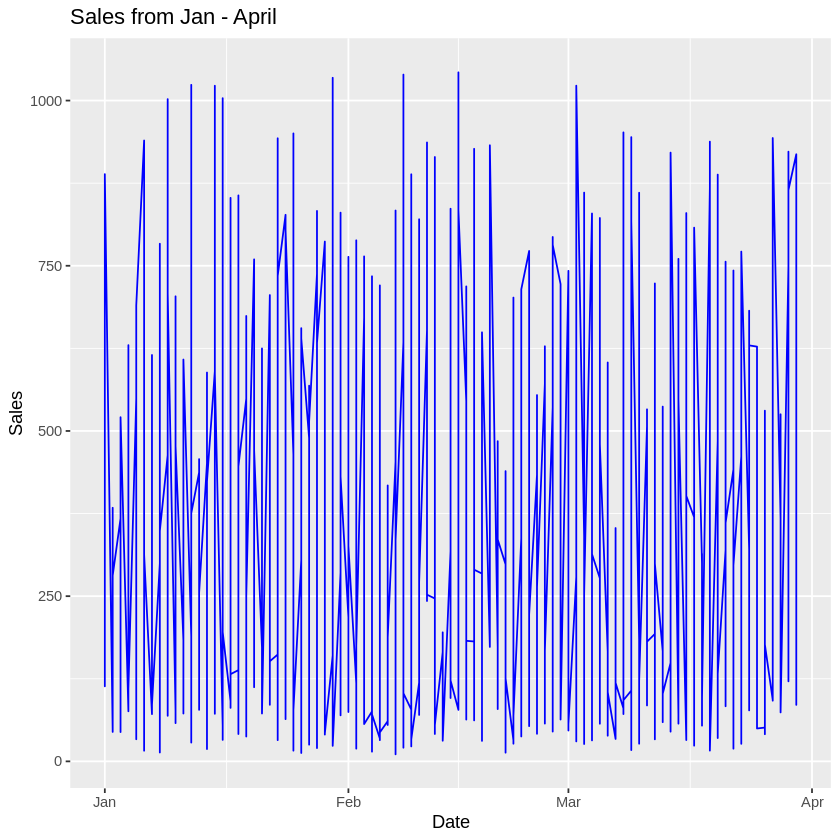

In [5]:


#I plotted all the Sales made in my dataset.
viz <- dataset %>%  
  ggplot(aes(x = Date, y = Sales)) +
  geom_line(col = "blue") +
  ggtitle("Sales from Jan - April") +
  labs(x = "Date", y = "Sales")
viz

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

median_span = 30 days



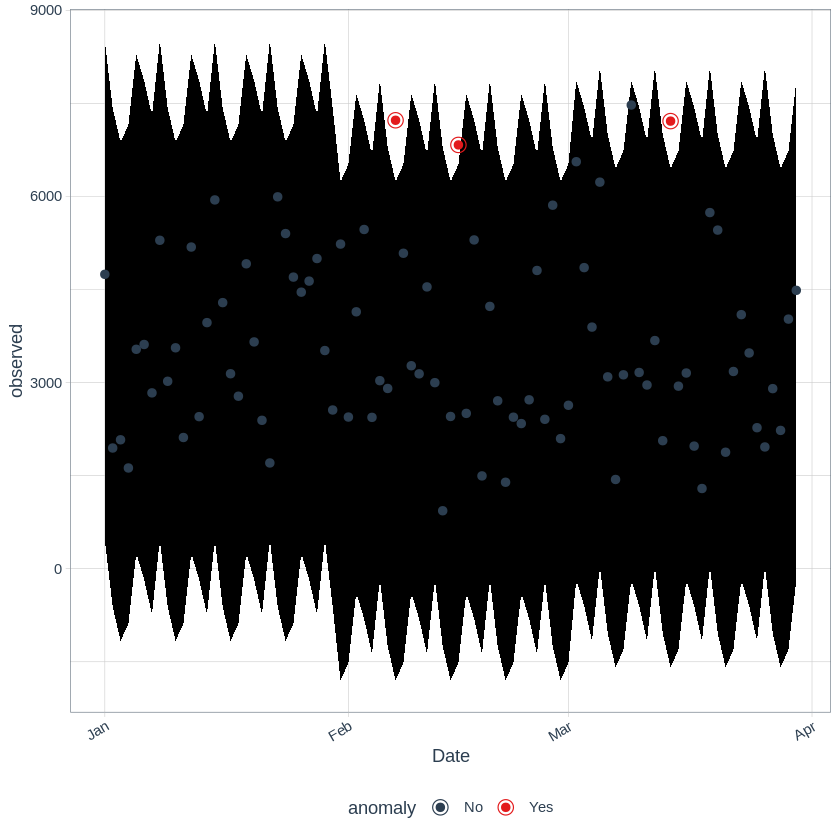

In [12]:
#I then used the anomalize() function to detect anomalies in my dataset.
 dataset %>%
  group_by(Date) %>%
  summarise(Orders = sum(Sales)) %>%
  time_decompose(Orders, method = "twitter", frequency = "auto", trend = "auto") %>%
  anomalize(remainder, method = "gesd",alpha = 0.05, max_anoms = 0.2) %>%
  time_recompose() %>%
  # Anomaly Visualization
  plot_anomalies(
  time_recomposed =T,
  ncol = 3,
  color_no = "#2c3e50",
  color_yes = "#e31a1c",
  fill_ribbon = "black",
  size_dots = 2,
  size_circles = 4)

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

median_span = 30 days



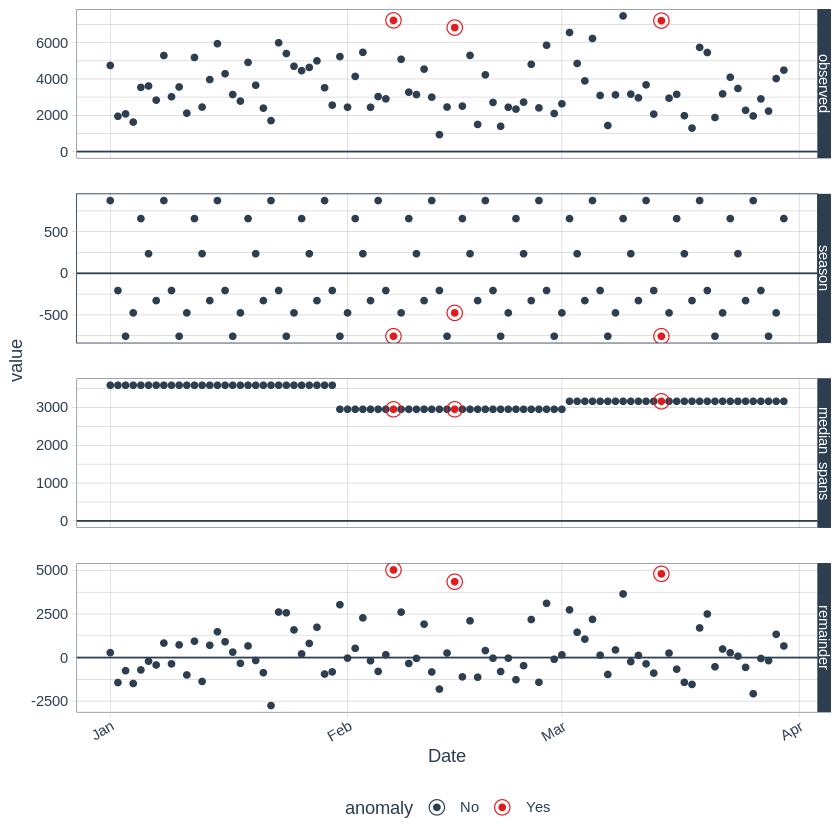

In [9]:
#I visualized the decomposition using plot_anomaly_decomposition().


 dataset %>%
  group_by(Date) %>%
  summarise(Orders = sum(Sales)) %>%
  time_decompose(Orders, method = "twitter", frequency = "auto", trend = "auto") %>%
  anomalize(remainder,method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
  time_recompose() %>%
  # Anomaly Visualization
  plot_anomaly_decomposition